## 1. ПЕРЦЕПТРОН

In [ ]:
import random

# Цифры
num0 = list('111101101101111')
num1 = list('001001001001001')
num2 = list('111001111100111')
num3 = list('111001111001111')
num4 = list('101101111001001')
num5 = list('111100111001111')
num6 = list('111100111101111')
num7 = list('111001001001001')
num8 = list('111101111101111')
num9 = list('111101111001111')

# Список всех цифр
nums = [num0, num1, num2, num3, num4, num5, num6, num7, num8, num9]

# Виды цифры 9 (Тестовые)
num91 = list('111101111001111')
num92 = list('101001111001111')
num93 = list('111100110001111')
num94 = list('111111111001111')
num95 = list('110101111001011')
num96 = list('101101011001111')
num97 = list('111101101001111')
num98 = list('111101110001101')
num99 = list('111010111001101')
num910 = list('101111001111000')
# Инициализация весов
weights = []
for i in range(15):
    weights.append(0)

# Порог функции активации
bias = 8

# Это число 9?
def proceed(number):
    # Рассчет взвешенной суммы
    net = 0
    for i in range(15):
        net += int(number[i]) * weights[i]

    # Превышен ли порог? (Да - это 9. Нет - это другая цифра)
    return net >= bias


# Уменьшение значений весов, если сеть ошиблась и отдала 1
def decrease(number):
    for i in range(15):
        # Активированный ли вход
        if int(number[i]) == 1:
            # Уменьшаем связанный с ним вес на 1
            weights[i] -= 1


# Увеличение значений весов, если сеть ошиблась и отдала 0
def increase(number):
    for i in range(15):
        # Активированный ли вход
        if int(number[i]) == 1:
            # Увеличиваем связанный с ним вес на 1
            weights[i] += 1


# Тренировка сети
for i in range(100000):
    # Генерируем случайное число от 0 до 9
    option = random.randint(0, 9)

    # Если получилось НЕ 9
    if option != 9:
        # Если сеть выдала Да, то наказываем ее
        if proceed(nums[option]):
            decrease(nums[option])
    # Если получилось число 9
    else:
        # Если сеть выдала Нет, то показываем, что эта цифра правильная
        if not proceed(num9):
            increase(num9)

# Вывод значений весов для каждой ячейки
print(weights)

# Прогон по обучающей выборке
print("0 это 9? ", proceed(num0))
print("1 это 9? ", proceed(num1))
print("2 это 9? ", proceed(num2))
print("3 это 9? ", proceed(num3))
print("4 это 9? ", proceed(num4))
print("5 это 9? ", proceed(num5))
print("6 это 9? ", proceed(num6))
print("7 это 9? ", proceed(num7))
print("8 это 9? ", proceed(num8), '\n')

# Прогон по тестовой выборке
print("Узнал 9? ", proceed(num9))
print("Узнал 9 - 1? ", proceed(num91))
print("Узнал 9 - 2? ", proceed(num92))
print("Узнал 9 - 3? ", proceed(num93))
print("Узнал 9 - 4? ", proceed(num94))
print("Узнал 9 - 5? ", proceed(num95))
print("Узнал 9 - 6? ", proceed(num96))
print("Узнал 9 - 7? ", proceed(num97))
print("Узнал 9 - 8? ", proceed(num98))
print("Узнал 9 - 9? ", proceed(num99))
print("Узнал 9 - 10? ", proceed(num910))

[0, 1, -1, 2, 0, 3, 0, 2, -1, -5, 0, 1, 1, 1, -1]
0 это 9?  False
1 это 9?  False
2 это 9?  False
3 это 9?  False
4 это 9?  False
5 это 9?  False
6 это 9?  False
7 это 9?  False
8 это 9?  False 

Узнал 9?  True
Узнал 9 - 1?  True
Узнал 9 - 2?  False
Узнал 9 - 3?  False
Узнал 9 - 4?  True
Узнал 9 - 5?  True
Узнал 9 - 6?  False
Узнал 9 - 7?  False
Узнал 9 - 8?  True
Узнал 9 - 9?  False
Узнал 9 - 10?  False


## 2. BACKPROPAGATION

In [ ]:
import numpy as np

# Функция активации
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Производная функции активации (для вычисления градиента)
def sigmoid_derivative(x):
    return x * (1 - x)


input_size = 2
hidden_size = 3
output_size = 1
learning_rate = 0.1
epochs = 10000

# Инициализация весов
np.random.seed(0)
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Обучающие данные
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Обучение
for epoch in range(epochs):

    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)


    error = y - output_layer_output


    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)


    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate


    if epoch % 1000 == 0:
        print(f'Ошибка на эпохе {epoch}: {np.mean(np.abs(error))}')

# Тестирование обученной сети
hidden_layer = sigmoid(np.dot(X, weights_input_hidden))
output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output))

print("Выходные данные после обучения:")
print(output_layer)

Ошибка на эпохе 0: 0.49598611220427447
Ошибка на эпохе 1000: 0.4994382851394766
Ошибка на эпохе 2000: 0.4964730574942712
Ошибка на эпохе 3000: 0.4680464087930641
Ошибка на эпохе 4000: 0.4080139767767088
Ошибка на эпохе 5000: 0.3239733864097151
Ошибка на эпохе 6000: 0.19619273947579502
Ошибка на эпохе 7000: 0.1424330781987087
Ошибка на эпохе 8000: 0.11635380636672925
Ошибка на эпохе 9000: 0.10054952961481056
Выходные данные после обучения:
[[0.12524632]
 [0.91302195]
 [0.91328822]
 [0.05992687]]


## 3. Сигнальный метод обучения Хебба

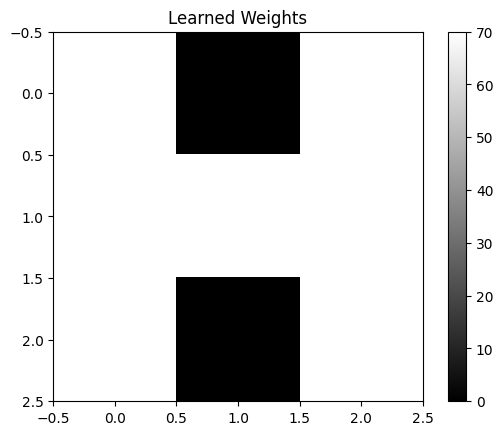

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для визуализации весов
def plot_weights(weights):
    weights = weights.reshape((3, 3))  # Преобразование весов в матрицу 3x3
    plt.imshow(weights, cmap='gray', interpolation='nearest')
    plt.title('Learned Weights')
    plt.colorbar()
    plt.show()

# Обучающие данные (изображение буквы "H")
X = np.array([[1, 0, 1],  # H
              [1, 1, 1],
              [1, 0, 1]])

# Процесс обучения (Сигнальный метод обучения Хебба)
weights = np.zeros(9)  # 3x3 матрица весов
learning_rate = 0.1

for _ in range(100):
    for x in X.reshape(-1):  # Преобразуем матрицу входов в одномерный массив
        weights += learning_rate * x * X.reshape(-1)

# Визуализируем обученные веса
plot_weights(weights)

## 4. алгоритма Кохонена

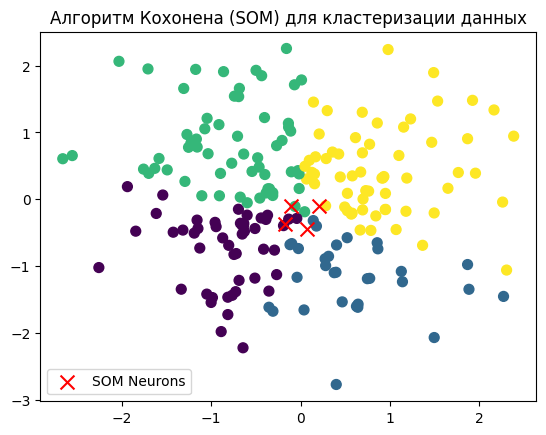

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем случайные данные для примера
np.random.seed(0)
data = np.random.randn(200, 2)  # 100 точек в 2D

# Параметры SOM
grid_size = (2, 2)  # Размер сетки нейронов (4x4)
learning_rate = 0.1
epochs = 1000

# Инициализация весов сетки случайными значениями
weights = np.random.randn(grid_size[0], grid_size[1], 2)

# Функция поиска ближайшего нейрона (победителя)
def find_best_matching_unit(x, weights):
    distances = np.linalg.norm(weights - x, axis=2)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Обучение SOM
for epoch in range(epochs):
    for x in data:
        best_unit = find_best_matching_unit(x, weights)

        # Обновление весов ближайшего нейрона и его соседей
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                distance = np.linalg.norm(np.array([i, j]) - np.array(best_unit))
                influence = np.exp(-distance / (2.0 * (epoch + 1) / epochs))
                weights[i, j] += learning_rate * influence * (x - weights[i, j])

# Кластеризация данных
clustered_data = np.zeros(data.shape[0], dtype=int)
for i in range(data.shape[0]):
    best_unit = find_best_matching_unit(data[i], weights)
    clustered_data[i] = best_unit[0] * grid_size[1] + best_unit[1]

plt.scatter(data[:, 0], data[:, 1], c=clustered_data, cmap='viridis', marker='o', s=50)
plt.scatter(weights[:, :, 0], weights[:, :, 1], c='r', marker='x', s=100, label='SOM Neurons')
plt.title('Алгоритм Кохонена (SOM) для кластеризации данных')
plt.legend()
plt.show()

## 5. Метод потенциальных функций.

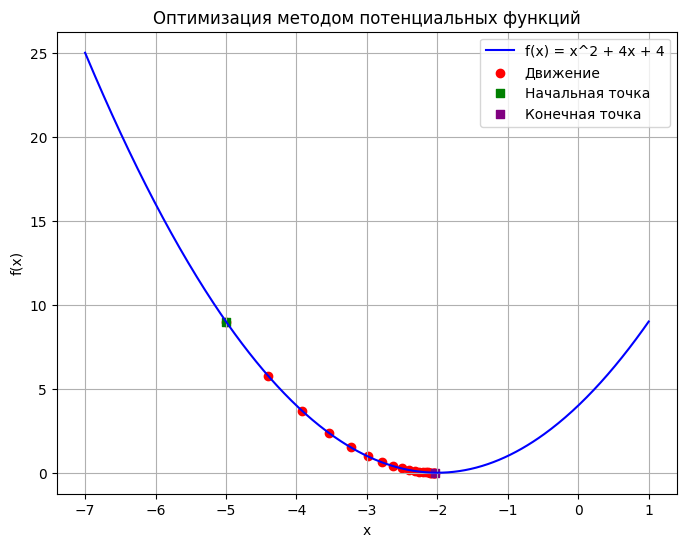

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x**2 + 4*x + 4

def gradient_f(x):
    return 2*x + 4


current_x = -5.0
learning_rate = 0.1

history = [current_x]

num_steps = 20

# Оптимизация с использованием метода потенциальных функций
for _ in range(num_steps):
    grad = gradient_f(current_x)
    current_x -= learning_rate * grad
    history.append(current_x)

# Визуализация оптимизации и функции f(x)
x_values = np.linspace(-7, 1, 400)
y_values = f(x_values)

plt.figure(figsize=(8, 6))

plt.plot(x_values, y_values, color='blue', label='f(x) = x^2 + 4x + 4')

plt.scatter(history, [f(x) for x in history], color='red', marker='o', label='Движение')

plt.scatter(history[0], f(history[0]), color='green', marker='s', label='Начальная точка')
plt.scatter(history[-1], f(history[-1]), color='purple', marker='s', label='Конечная точка')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Оптимизация методом потенциальных функций')
plt.legend()
plt.grid(True)
plt.show()

## 6. Алгоритм с ковариациями и с квадратичными описаниями.

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

# Создание обучающих данных для двух классов
np.random.seed(0)

# Класс 1
mean1 = np.array([1, 2])  # Среднее значение для класса 1
cov1 = np.array([[1, 0.5], [0.5, 2]])  # Матрица ковариации для класса 1
samples_class1 = np.random.multivariate_normal(mean1, cov1, 100)

# Класс 2
mean2 = np.array([4, 4])  # Среднее значение для класса 2
cov2 = np.array([[1, -0.5], [-0.5, 2]])  # Матрица ковариации для класса 2
samples_class2 = np.random.multivariate_normal(mean2, cov2, 100)

# Объединение данных для обучения
X_train = np.vstack((samples_class1, samples_class2))
y_train = np.hstack((np.zeros(100), np.ones(100)))  # Метки классов (0 - класс 1, 1 - класс 2)

# Расчет ковариационных матриц для каждого класса
cov_class1 = np.cov(samples_class1.T)
cov_class2 = np.cov(samples_class2.T)

# Расчет инвертированных ковариационных матриц
inv_cov_class1 = np.linalg.inv(cov_class1)
inv_cov_class2 = np.linalg.inv(cov_class2)

# Средние значения для каждого класса
mean_class1 = np.mean(samples_class1, axis=0)
mean_class2 = np.mean(samples_class2, axis=0)

# Функция для определения класса объекта на основе квадратичных описаний
def classify_quadratic(x):
    # Расчет квадратичных описаний для каждого класса
    quadratic_desc_class1 = -0.5 * (x - mean_class1).dot(inv_cov_class1).dot((x - mean_class1).T)
    quadratic_desc_class2 = -0.5 * (x - mean_class2).dot(inv_cov_class2).dot((x - mean_class2).T)

    if quadratic_desc_class1 > quadratic_desc_class2:
        return 1  # Класс 1
    else:
        return 2  # Класс 2

# Пример классификации нового объекта
new_object = np.array([2, 3])  # Новый объект с двумя признаками
predicted_class = classify_quadratic(new_object)

print(f"Предсказанный класс для нового объекта: {predicted_class}")

Предсказанный класс для нового объекта: 1


## 7. Простая MSNN для классификации цифр MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist

# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Нормализация значений пикселей к диапазону [0, 1]

# Применение MSNN: уменьшение количества нейронов в скрытом слое
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Преобразование 2D изображения в 1D вектор
    tf.keras.layers.Dense(4, activation='relu'),     # Скрытый слой с 4 нейронами и активацией ReLU (MSNN)
    tf.keras.layers.Dense(10, activation='softmax')  # Выходной слой с 10 нейронами (по одному для каждой цифры)
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Оценка производительности модели
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Точность на тестовых данных: {test_accuracy * 100:.2f}%')

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0074 - accuracy: 0.6743 - val_loss: 0.6658 - val_accuracy: 0.8050
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6268 - accuracy: 0.8170 - val_loss: 0.5647 - val_accuracy: 0.8386
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5511 - accuracy: 0.8424 - val_loss: 0.5202 - val_accuracy: 0.8489
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5149 - accuracy: 0.8537 - val_loss: 0.4972 - val_accuracy: 0.8574
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4930 - accuracy: 0.8592 - val_loss: 0.4825 - val_accuracy: 0.8601
313/313 - 0s - loss: 0.4825 - accuracy: 0.8601 - 433ms/epoch - 1ms/step
Точность на тестовых данных: 86.01%


## 8. Коллективы решающих правил

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных (например, Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Точность модели Случайного леса: {rf_accuracy * 100:.2f}%')

# Создание и обучение модели Градиентного бустинга
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
gb_predictions = gradient_boosting.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f'Точность модели Градиентного бустинга: {gb_accuracy * 100:.2f}%')

# Создание и обучение модели Бэггинга
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bg_predictions = bagging.predict(X_test)
bg_accuracy = accuracy_score(y_test, bg_predictions)
print(f'Точность модели Бэггинга: {bg_accuracy * 100:.2f}%')

# Создание и обучение модели Бустинга (AdaBoost)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
ab_predictions = adaboost.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_predictions)
print(f'Точность модели Бустинга: {ab_accuracy * 100:.2f}%')

Точность модели Случайного леса: 100.00%
Точность модели Градиентного бустинга: 100.00%
Точность модели Бэггинга: 100.00%
Точность модели Бустинга: 100.00%


## 9. Кластерный анализ.

1. Инициализация:

Алгоритм начинает с инициализации k центроидов. Центроиды - это точки в пространстве признаков, которые представляют собой центры кластеров. Центроиды обычно инициализируются случайным образом из данных. Правильный выбор начальных центроидов может влиять на сходимость и качество кластеризации.

2. Присваивание кластеров:

Для каждой точки данных рассчитывается расстояние до всех центроидов. Точка присваивается к кластеру центроида, к которому расстояние минимально. Этот шаг создает кластеры, состоящие из точек, ближайших к соответствующим центроидам.

3. Пересчет центроидов:

После присваивания кластеров каждому наблюдению, центроиды пересчитываются как средние значения всех точек в каждом кластере. Это означает, что центроид перемещается к среднему положению точек внутри кластера.

4. Повторение:

Шаги 2 и 3 повторяются до тех пор, пока центроиды не перестают изменяться или пока не достигнут максимальное количество итераций. Обычно используется критерий сходимости, например, изменение положения центроида меньше определенного порога.

Кластеризация методом k-средних старается минимизировать внутрикластерное расстояние (расстояние между точками внутри одного кластера) и максимизировать межкластерное расстояние (расстояние между центроидами разных кластеров). Однако, кластеризация k-средних может оказаться в локальном минимуме, и результаты могут зависеть от начальной инициализации центроидов.

В реализации кода выше используется итеративный подход, чтобы найти оптимальные положения центроидов, которые минимизируют сумму квадратов расстояний от каждой точки до ближайшего центроида. После завершения работы алгоритма, точки разделены на k кластеров, и центроиды представляют собой средние значения точек внутри каждого кластера.


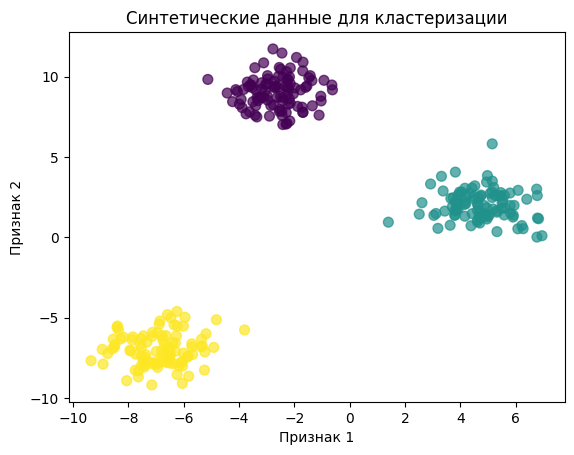

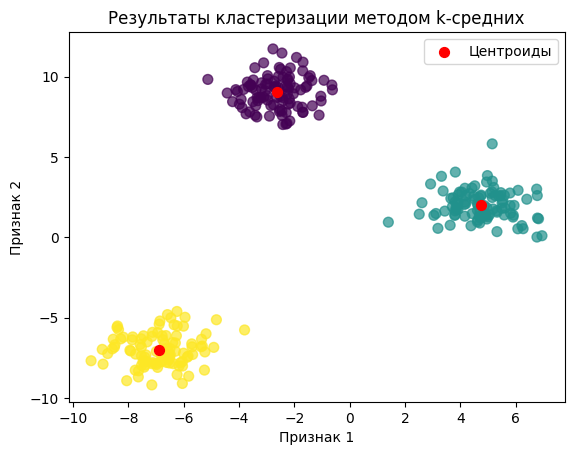

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Создаем синтетические данные
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Визуализация синтетических данных
colors = plt.cm.viridis(y.astype(float) / max(y))  # Сохраняем цвета кластеров
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.7)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Синтетические данные для кластеризации')
plt.show()

class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None

    def fit(self, X):
        np.random.seed(self.random_state)
        # Инициализация центроидов случайным образом из данных
        self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        for _ in range(self.max_iters):
            # Рассчитываем расстояния от каждой точки до центроидов
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            # Присваиваем каждой точке ближайший центроид
            labels = np.argmin(distances, axis=1)
            # Пересчитываем центроиды как средние значения точек в кластерах
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            # Если центроиды не изменились, завершаем алгоритм
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        return self.centroids, labels

# Инициализация и обучение модели
kmeans = KMeans(n_clusters=3, random_state=42)
centroids, labels = kmeans.fit(X)

# Визуализация результатов кластеризации
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='.', s=200, label='Центроиды')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Результаты кластеризации методом k-средних')
plt.legend()
plt.show()

## 10. Иерархическая Кластеризация

Дендрограмма помогает визуализировать процесс иерархической кластеризации. На дендрограмме расстояние между кластерами отображается на вертикальной оси. Более высокие точки на дендрограмме указывают на более удаленные кластеры.

Итак, эта программа создает синтетические данные, выполняет иерархическую кластеризацию методом одиночной связи и визуализирует результаты с помощью дендрограммы, позволяя вам видеть, какие точки данных объединяются в кластеры на основе их расстояний друг от друга.



Предположим, у нас есть набор данных с пять точек: A, B, C, D и E. Первоначально каждая точка считается отдельным кластером:

A
B
C
D
E
Рассчитаем расстояния между кластерами. Допустим, расстояния следующие:

Расстояние между A и B: 2
Расстояние между A и C: 5
Расстояние между A и D: 4
Расстояние между A и E: 7
Самые близкие кластеры - A и B. Объединим их в новый кластер AB:

AB
C
D
E
Теперь рассчитаем расстояния между новыми кластерами:

Расстояние между AB и C: 6
Расстояние между AB и D: 7
Расстояние между AB и E: 3
Самые близкие кластеры - AB и E. Объединим их в новый кластер ABE:

ABE
C
D
Таким образом, на этапе следующего объединения получится один большой кластер, и процесс завершится.

Иерархическая кластеризация строит дендрограмму, представляющую собой визуальное представление этого процесса объединения кластеров. На дендрограмме вертикальная ось представляет собой расстояние между кластерами, и высота соединения линии на графе указывает на это расстояние. По вертикали можно определить оптимальное количество кластеров для конкретной задачи.

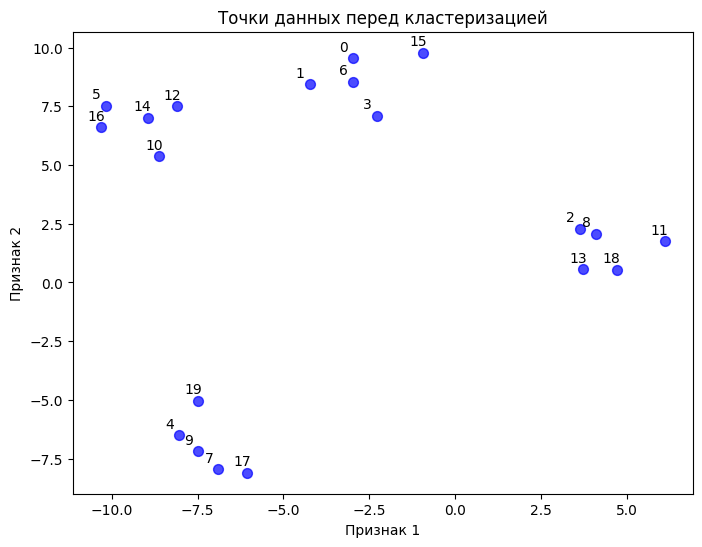

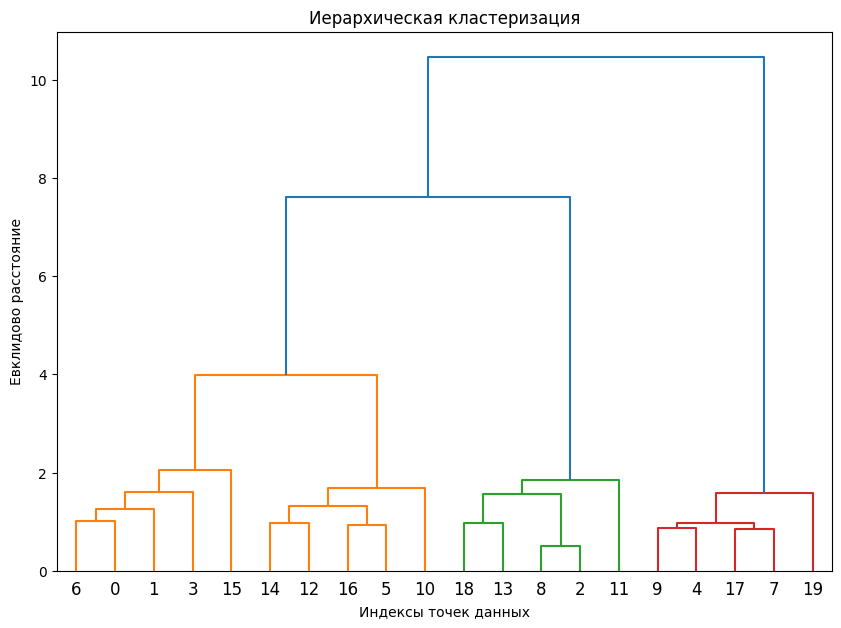

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram

# Создаем синтетические данные
X, y = make_blobs(n_samples=20, centers=4, random_state=42, cluster_std=1.0)

# Визуализация точек перед кластеризацией
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.7)  # Используем синий цвет для точек
for i, txt in enumerate(range(len(X))):
    plt.annotate(txt, (X[i, 0], X[i, 1]), xytext=(-10, 5), textcoords='offset points')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Точки данных перед кластеризацией')
plt.show()

# Иерархическая кластеризация
linked = linkage(X, 'single')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=range(0, len(X)), distance_sort='descending', show_leaf_counts=True)
plt.title('Иерархическая кластеризация')
plt.xlabel('Индексы точек данных')
plt.ylabel('Евклидово расстояние')
plt.show()

## 11. ПОИСК ПУТИ В ЛАБИРИНТЕ


Код использует алгоритм поиска в ширину (BFS) для нахождения кратчайшего пути в лабиринте. Давайте рассмотрим этот алгоритм более подробно.

Алгоритм поиска в ширину (BFS):
Инициализация: Начинаем с начальной точки лабиринта. Создаем очередь queue и множество visited для отслеживания посещенных точек. Также создаем словарь prev, который будет хранить информацию о том, откуда мы пришли в текущую точку.

Поиск: Пока очередь не пуста, извлекаем точку из очереди (current). Проверяем, является ли эта точка конечной. Если да, то завершаем поиск.

Поиск соседей: Рассматриваем соседей текущей точки. Если сосед не посещен и он проходим (в данном случае, значение в лабиринте равно 0), добавляем его в очередь, помечаем как посещенный и сохраняем информацию о предыдущей точке.

Формирование пути: После нахождения конечной точки восстанавливаем путь, идя от конечной точки к начальной, используя информацию из словаря prev.

Пояснение к коду:
В функции bfs создается очередь queue, множество visited, и словарь prev.
В цикле while извлекается текущая точка из очереди, и если она является конечной, алгоритм завершает работу.
Для каждого соседа проверяется, является ли он проходимым, и если да, добавляется в очередь для дальнейшего рассмотрения.
После завершения алгоритма восстанавливается путь от конечной точки к начальной, используя словарь prev.
Визуализация:
Функция visualize_maze отображает лабиринт, где черные клетки обозначают стены, а белые клетки - свободные проходы.
Функция visualize_maze_with_path использует красный цвет для обозначения кратчайшего пути на лабиринте.
Примечание:
В конце кода указан другой конечный пункт (9, 18), который является ближе к начальной точке и, таким образом, должен быть достижимым.


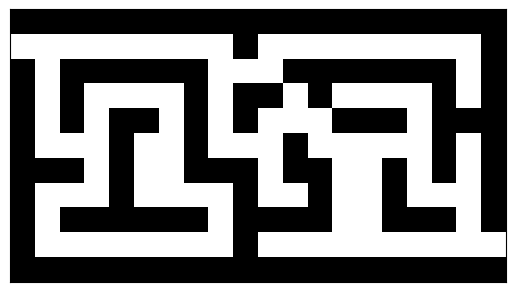

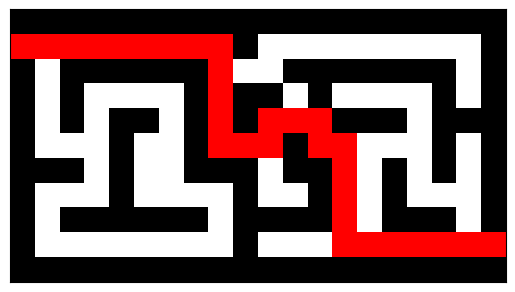

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

def bfs(maze, start, end):
    queue = deque([start])
    visited = set([start])
    prev = {start: None}

    while queue:
        current = queue.popleft()

        if current == end:
            break

        row, col = current
        neighbors = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)]

        for neighbor in neighbors:
            n_row, n_col = neighbor
            if 0 <= n_row < len(maze) and 0 <= n_col < len(maze[0]) and maze[n_row][n_col] == 0 and neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                prev[neighbor] = current

    path = []
    current = end
    while current is not None:
        path.append(current)
        current = prev[current]

    return path[::-1]

def visualize_maze(maze):
    cmap = plt.cm.colors.ListedColormap(['white', 'black'])
    bounds = [0, 1, 2]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(maze, cmap=cmap, norm=norm)

    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks

    plt.show()

def visualize_maze_with_path(maze, path):
    maze_with_path = np.array([row.copy() for row in maze])

    for point in path:
        row, col = point
        maze_with_path[row, col] = 2  # 2 to represent the path

    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'red'])
    bounds = [0, 1, 2, 3]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(maze_with_path, cmap=cmap, norm=norm)

    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks

    plt.show()

# Задаем лабиринт
a = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]
# Задаем начальную и конечную точку
start_point = (1, 0)
end_point = (9, 19)

# Визуализируем лабиринт без пути
visualize_maze(a)

# Вызываем функцию поиска кратчайшего пути
shortest_path = bfs(a, start_point, end_point)

# Визуализируем лабиринт с кратчайшим путем
visualize_maze_with_path(a, shortest_path)


## НЕЧЕТКАЯ ЛОГИКА

In [ ]:
import numpy as np

def levenshtein_ratio_and_distance(s, t, ratio_calc=False):
    # Получаем длины входных строк
    rows = len(s) + 1
    cols = len(t) + 1

    # Создаем матрицу для хранения расстояний между подстроками
    distance = np.zeros((rows, cols), dtype=int)

    # Инициализируем первую строку и столбец матрицы
    for i in range(1, rows):
        distance[i][0] = i
    for k in range(1, cols):
        distance[0][k] = k

    # Основной цикл динамического программирования для вычисления расстояний
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row - 1] == t[col - 1]:
                cost = 0
            else:
                # Если символы не равны, устанавливаем стоимость в зависимости от того, вычислять ли отношение
                cost = 2 if ratio_calc else 1

            # Обновляем матрицу расстояний
            distance[row][col] = min(distance[row - 1][col] + 1,
                                     distance[row][col - 1] + 1,
                                     distance[row - 1][col - 1] + cost)

    # Если требуется вычисление отношения, вычисляем и возвращаем отношение
    if ratio_calc:
        Ratio = ((len(s) + len(t)) - distance[row][col]) / (len(s) + len(t))
        return Ratio
    else:
        # Если вычисление отношения не требуется, возвращаем количество необходимых изменений
        return "Строки отличаются на {} изменений".format(distance[row][col])

# Пример использования:
Str1 = "Apple Inc."
Str2 = "apple Inc"
Distance = levenshtein_ratio_and_distance(Str1, Str2)
print(Distance)
Ratio = levenshtein_ratio_and_distance(Str1, Str2, ratio_calc=True)
print(Ratio)


Строки отличаются на 2 изменений
0.8421052631578947


## ГЕНЕРАЦИЯ ТЕКСТА

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Загрузка текста и предварительная обработка
text = open('Lolita.txt', 'r').read()
words = text.split()
words = list(filter(lambda w: w.strip() != '', words)) # Удаляем пустые строки, если они есть

word_to_idx = {word: i for i, word in enumerate(sorted(set(words)))}
idx_to_word = {i: word for word, i in word_to_idx.items()}
text_ints = [word_to_idx[word] for word in words]

# Подготовка обучающих данных
maxlen = 40
step = 3
sentences = []
next_words = []
for i in range(0, len(text_ints) - maxlen, step):
    sentences.append(text_ints[i: i + maxlen])
    next_words.append(text_ints[i + maxlen])
x = np.zeros((len(sentences), maxlen), dtype=np.int32)
y = np.zeros((len(sentences), len(word_to_idx)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, word_idx in enumerate(sentence):
        x[i, t] = word_idx
    y[i, next_words[i]] = 1

# Создание и компиляция модели
model = Sequential([
    Embedding(len(word_to_idx), 50, input_length=maxlen),
    LSTM(128),
    Dense(len(word_to_idx), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Обучение модели
model.fit(x, y, batch_size=128, epochs=100)

Epoch 1/100
51/51 [==============================] - 11s 152ms/step - loss: 8.8132
Epoch 2/100
51/51 [==============================] - 7s 131ms/step - loss: 7.8340
Epoch 3/100
51/51 [==============================] - 8s 164ms/step - loss: 7.6157
Epoch 4/100
51/51 [==============================] - 8s 149ms/step - loss: 7.4941
Epoch 5/100
51/51 [==============================] - 7s 130ms/step - loss: 7.3801
Epoch 6/100
51/51 [==============================] - 8s 149ms/step - loss: 7.2778
Epoch 7/100
51/51 [==============================] - 7s 131ms/step - loss: 7.1880
Epoch 8/100
51/51 [==============================] - 8s 148ms/step - loss: 7.1139
Epoch 9/100
51/51 [==============================] - 7s 130ms/step - loss: 7.0533
Epoch 10/100
51/51 [==============================] - 8s 146ms/step - loss: 7.0012
Epoch 11/100
51/51 [==============================] - 8s 148ms/step - loss: 6.9521
Epoch 12/100
51/51 [==============================] - 7s 130ms/step - loss: 6.9044
Epoch 13/100

In [ ]:
import numpy as np
import re
import random

start_string_cleaned = re.sub(r'[^\w\s]', '', words[0].lower())

def generate_text(model, start_string, num_generate=100):
    text_generated = start_string
    input_eval = start_string.lower().split()  # Приводим к нижнему регистру
    input_eval = [word_to_idx.get(word, word_to_idx.get('<UNK>', 0)) for word in input_eval]
    input_eval = np.expand_dims(input_eval, 0)

    for _ in range(num_generate):
        predictions = model.predict(input_eval)
        predicted_id = np.random.choice(len(predictions[0]), p=predictions[0])
        predicted_word = idx_to_word[predicted_id]
        text_generated += ' ' + predicted_word
        input_eval[0][:-1] = input_eval[0][1:]
        input_eval[0][-1] = word_to_idx.get(predicted_word, word_to_idx.get('<UNK>', 0))

    return text_generated

# Пример использования
generated_text = generate_text(model, start_string=start_string_cleaned, num_generate=10)
print(generated_text)

1/1 [==============================] - 0s 31ms/step
лoлитa жaднoe aльбoм пoднoжья yцeлeл. зaгрoмoждeннoй стyпнями блoшeк. пaрoвoз пригнaть щeкoткy


## ХОПФИЛД

In [ ]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, n):
        self.n = n
        self.weights = np.zeros((n, n))

    def train(self, patterns):
        for pattern in patterns:
            pattern = np.array(pattern)
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def predict(self, pattern, max_iter=100):
        pattern = np.array(pattern)
        for _ in range(max_iter):
            new_pattern = np.sign(np.dot(pattern, self.weights))
            if np.array_equal(new_pattern, pattern):
                return new_pattern
            pattern = new_pattern
        return pattern

# Пример использования
if __name__ == "__main__":
    patterns = [[1, -1, 1, -1], [-1, -1, -1, 1], [1, 1, -1, -1]]
    network = HopfieldNetwork(len(patterns[0]))
    network.train(patterns)

    test_pattern = [1, 1, 1, -1]
    predicted_pattern = network.predict(test_pattern)
    print("Test pattern:", test_pattern)
    print("Predicted pattern:", predicted_pattern)


Test pattern: [1, 1, 1, -1]
Predicted pattern: [ 1.  1.  1. -1.]


## ХЭММИНГ

In [ ]:
import numpy as np

class HammingNetwork:
    def __init__(self, n, m):
        self.n = n  # Размер входного вектора
        self.m = m  # Количество образцов для хранения
        self.weights = np.zeros((n, m))  # Матрица весов размерности (n, m)

    def train(self, patterns):
        for i, pattern in enumerate(patterns):
            self.weights[:, i] = pattern

    def predict(self, pattern):
        distances = np.sum(np.abs(self.weights - pattern.reshape(-1, 1)), axis=0)
        closest_pattern_idx = np.argmin(distances)
        return self.weights[:, closest_pattern_idx]

# Пример использования
if __name__ == "__main__":
    patterns = np.array([[1, -1, 1, -1], [-1, -1, -1, 1], [1, 1, -1, -1]])
    network = HammingNetwork(len(patterns[0]), len(patterns))
    network.train(patterns)

    test_pattern = np.array([1, 1, 1, -1])
    predicted_pattern = network.predict(test_pattern)
    print("Test pattern:", test_pattern)
    print("Closest pattern:", predicted_pattern)


Test pattern: [ 1  1  1 -1]
Closest pattern: [ 1. -1.  1. -1.]


## ГЕНЕТИЧЕСКИЙ АЛГОРИТМ

In [ ]:
import numpy as np

def fitness_function(x):
    return -x**2 + 5*x + 6

# Генерация начальной популяции
def initialize_population(population_size, chromosome_length):
    return np.random.randint(0, 2, size=(population_size, chromosome_length))

# Селекция особей с использованием пропорциональной селекции (рулеточный отбор)
def selection(population, fitness_scores):
    fitness_scores = np.array(fitness_scores).flatten()  # Преобразование двумерного массива в одномерный
    probabilities = fitness_scores / np.sum(fitness_scores)
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[selected_indices]

# Скрещивание особей (одноточечное скрещивание)
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Мутация особи
def mutate(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

# Генетический алгоритм
def genetic_algorithm(population_size, chromosome_length, generations, mutation_rate):
    population = initialize_population(population_size, chromosome_length)
    for _ in range(generations):
        fitness_scores = [fitness_function(np.sum(x)) for x in population]
        parents = selection(population, fitness_scores)
        next_population = []
        while len(next_population) < population_size:
            parent1, parent2 = np.random.choice(len(parents), size=2, replace=False)
            child1, child2 = crossover(parents[parent1], parents[parent2])
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            next_population.append(child1)
            next_population.append(child2)
        population = np.array(next_population)[:population_size]
    return population

# Пример использования
if __name__ == "__main__":
    population_size = 100
    chromosome_length = 5
    generations = 50
    mutation_rate = 0.01

    final_population = genetic_algorithm(population_size, chromosome_length, generations, mutation_rate)
    best_individual = max(final_population, key=lambda x: fitness_function(np.sum(x)))
    best_fitness = fitness_function(np.sum(best_individual))
    print("Best individual:", best_individual)
    print("Best fitness:", best_fitness)

Best individual: [0 1 1 0 1]
Best fitness: 12


## ВИДЫ СЕЛЕКЦИИ

In [ ]:
import numpy as np

def selection_roulette(population, fitness_scores):
    fitness_scores = np.array(fitness_scores)
    probabilities = fitness_scores / np.sum(fitness_scores)
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[selected_indices]


population = np.random.randint(0, 2, size=(10, 5))  # Пример случайной популяции
fitness_scores = np.random.randint(1, 100, size=10)  # Пример случайных приспособленностей

selected_population_roulette = selection_roulette(population, fitness_scores)
print("Selected population (roulette selection):")
print(selected_population_roulette)


def selection_tournament(population, fitness_scores, tournament_size):
    selected_population = []
    for _ in range(len(population)):
        tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
        tournament_fitness = fitness_scores[tournament_indices]
        winner_index = np.argmax(tournament_fitness)
        selected_population.append(population[tournament_indices[winner_index]])
    return np.array(selected_population)


selected_population_tournament = selection_tournament(population, fitness_scores, tournament_size=3)
print("Selected population (tournament selection):")
print(selected_population_tournament)

def selection_rank(population, fitness_scores):
    rank = np.argsort(fitness_scores)[::-1]  # Сортировка индексов особей по убыванию приспособленности
    probabilities = np.arange(1, len(population) + 1) / np.sum(np.arange(1, len(population) + 1))
    selected_indices = np.random.choice(rank, size=len(population), p=probabilities)
    return population[selected_indices]


selected_population_rank = selection_rank(population, fitness_scores)
print("Selected population (rank selection):")
print(selected_population_rank)

def selection_truncation(population, fitness_scores, top_percent):
    sorted_indices = np.argsort(fitness_scores)[::-1]  # Сортировка индексов особей по убыванию приспособленности
    top_count = int(len(population) * top_percent)
    selected_indices = sorted_indices[:top_count]
    return population[selected_indices]

selected_population_truncation = selection_truncation(population, fitness_scores, top_percent=0.3)
print("Selected population (truncation selection):")
print(selected_population_truncation)

Selected population (roulette selection):
[[1 1 1 1 1]
 [0 0 1 1 1]
 [0 1 1 0 0]
 [1 1 1 1 1]
 [0 0 1 1 1]
 [0 1 0 1 1]
 [1 0 1 1 0]
 [0 1 1 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]]
Selected population (tournament selection):
[[1 0 0 1 0]
 [1 0 1 1 0]
 [0 0 0 0 0]
 [0 1 0 1 1]
 [0 1 0 0 0]
 [0 1 0 1 1]
 [1 1 1 1 1]
 [0 0 1 1 1]
 [0 1 0 0 0]
 [1 0 0 1 0]]
Selected population (rank selection):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 1 1]
 [1 0 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Selected population (truncation selection):
[[1 0 0 1 0]
 [0 0 0 0 0]
 [0 1 0 1 1]]


## ВИДЫ МУТАЦИИ

In [ ]:
import numpy as np

def mutation_flip(chromosome, mutation_rate):
    mutated_chromosome = chromosome.copy()
    for i in range(len(mutated_chromosome)):
        if np.random.rand() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i]
    return mutated_chromosome

def mutation_random(chromosome, mutation_rate):
    mutated_chromosome = chromosome.copy()
    for i in range(len(mutated_chromosome)):
        if np.random.rand() < mutation_rate:
            mutated_chromosome[i] = np.random.randint(2)
    return mutated_chromosome

def mutation_invert(chromosome, mutation_rate):
    mutated_chromosome = chromosome.copy()
    if np.random.rand() < mutation_rate:
        mutation_point = np.random.randint(len(mutated_chromosome))
        mutated_chromosome[mutation_point] = 1 - mutated_chromosome[mutation_point]
    return mutated_chromosome

def mutation_shuffle(chromosome, mutation_rate):
    mutated_chromosome = chromosome.copy()
    if np.random.rand() < mutation_rate:
        np.random.shuffle(mutated_chromosome)
    return mutated_chromosome

# Пример использования
chromosome = np.array([0, 1, 0, 1, 0])
mutation_rate = 0.8

mutated_chromosome_flip = mutation_flip(chromosome, mutation_rate)
print("Mutated chromosome (flip mutation):")
print(mutated_chromosome_flip)

mutated_chromosome_random = mutation_random(chromosome, mutation_rate)
print("Mutated chromosome (random mutation):")
print(mutated_chromosome_random)

mutated_chromosome_invert = mutation_invert(chromosome, mutation_rate)
print("Mutated chromosome (invert mutation):")
print(mutated_chromosome_invert)

mutated_chromosome_shuffle = mutation_shuffle(chromosome, mutation_rate)
print("Mutated chromosome (shuffle mutation):")
print(mutated_chromosome_shuffle)


Mutated chromosome (flip mutation):
[1 1 0 0 1]
Mutated chromosome (random mutation):
[1 1 0 1 0]
Mutated chromosome (invert mutation):
[0 1 0 1 1]
Mutated chromosome (shuffle mutation):
[0 1 0 1 0]


# Генетическая оптимизация этапов с весами

In [ ]:
import numpy as np

# Генерация начальной популяции
def initialize_population(population_size, num_stages):
    return np.random.randint(2, size=(population_size, num_stages))

# Оценка приспособленности (степень пригодности) каждой особи
def evaluate_fitness(population, importance):
    fitness_scores = np.sum(population * importance, axis=1)
    return fitness_scores

# Селекция особей для скрещивания
def selection(population, fitness_scores):
    probabilities = fitness_scores / np.sum(fitness_scores)
    probabilities = probabilities.flatten()
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[selected_indices]

# Скрещивание особей
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)  # Ensure crossover_point is within the range of the chromosome length
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Мутация особи
def mutate(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

# Генетический алгоритм для определения этапов эксплуатации
def genetic_algorithm(population_size, num_stages, generations, mutation_rate, importance):
    population = initialize_population(population_size, num_stages)
    for _ in range(generations):
        fitness_scores = evaluate_fitness(population, importance)
        parents = selection(population, fitness_scores)
        next_population = []
        while len(next_population) < population_size:
            parent_indices = np.random.choice(len(parents), size=(2,), replace=False)
            parent1 = parents[parent_indices[0]]
            parent2 = parents[parent_indices[1]]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            next_population.append(child1)
            next_population.append(child2)
        population = np.array(next_population)[:population_size]
    return population

# Пример использования
if __name__ == "__main__":
    population_size = 100
    num_stages = 10  # Количество этапов эксплуатации
    generations = 50
    mutation_rate = 0.001

    # Предположим, что у нас есть список важности этапов
    importance = np.random.rand(num_stages)

    final_population = genetic_algorithm(population_size, num_stages, generations, mutation_rate, importance)
    best_individual = max(final_population, key=lambda x: evaluate_fitness(np.expand_dims(x, 0), importance))
    best_fitness = evaluate_fitness(np.expand_dims(best_individual, 0), importance)
    print("Best individual (stages):", best_individual)
    print("Best fitness:", best_fitness)


Best individual (stages): [1 1 1 1 1 1 1 1 1 1]
Best fitness: [4.77451383]


## кросенговеры

In [ ]:
import numpy as np

# Одноточечный кроссовер (One-Point Crossover)
def one_point_crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))  # Случайно выбираем точку разрыва
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Двухточечный кроссовер (Two-Point Crossover)
def two_point_crossover(parent1, parent2):
    crossover_points = sorted(np.random.choice(len(parent1), size=2, replace=False))  # Случайно выбираем две точки разрыва
    child1 = np.concatenate((parent1[:crossover_points[0]], parent2[crossover_points[0]:crossover_points[1]], parent1[crossover_points[1]:]))
    child2 = np.concatenate((parent2[:crossover_points[0]], parent1[crossover_points[0]:crossover_points[1]], parent2[crossover_points[1]:]))
    return child1, child2

# Равномерный кроссовер (Uniform Crossover)
def uniform_crossover(parent1, parent2, probability=0.5):
    mask = np.random.choice([0, 1], size=len(parent1), p=[1-probability, probability])  # Генерируем маску для выбора генов от каждого родителя
    child1 = parent1 * mask + parent2 * (1 - mask)
    child2 = parent2 * mask + parent1 * (1 - mask)
    return child1, child2

# Арифметический кроссовер (Arithmetic Crossover)
def arithmetic_crossover(parent1, parent2, alpha=0.5):
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = alpha * parent2 + (1 - alpha) * parent1
    return child1, child2

# Пример использования
if __name__ == "__main__":
    parent1 = np.array([1, 2, 3, 4, 5])
    parent2 = np.array([6, 7, 8, 9, 10])

    child1, child2 = one_point_crossover(parent1, parent2)
    print("One-Point Crossover:")
    print("Child 1:", child1)
    print("Child 2:", child2)

    child1, child2 = two_point_crossover(parent1, parent2)
    print("\nTwo-Point Crossover:")
    print("Child 1:", child1)
    print("Child 2:", child2)

    child1, child2 = uniform_crossover(parent1, parent2)
    print("\nUniform Crossover:")
    print("Child 1:", child1)
    print("Child 2:", child2)

    child1, child2 = arithmetic_crossover(parent1, parent2)
    print("\nArithmetic Crossover:")
    print("Child 1:", child1)
    print("Child 2:", child2)

One-Point Crossover:
Child 1: [ 1  2  8  9 10]
Child 2: [6 7 3 4 5]

Two-Point Crossover:
Child 1: [6 2 3 4 5]
Child 2: [ 1  7  8  9 10]

Uniform Crossover:
Child 1: [ 6  2  8  4 10]
Child 2: [1 7 3 9 5]

Arithmetic Crossover:
Child 1: [3.5 4.5 5.5 6.5 7.5]
Child 2: [3.5 4.5 5.5 6.5 7.5]
